# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | onega
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | chui
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | wenling
Processing Record 18 of Set 1 | port moresby
Processing Record 19 of Set 1 | usogorsk
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | sain

Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | launceston
Processing Record 44 of Set 4 | berezovyy
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | vegreville
Processing Record 47 of Set 4 | dadukou
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | hawaiian paradise park
Processing Record 1 of Set 5 | benalla
Processing Record 2 of Set 5 | castro-urdiales
Processing Record 3 of Set 5 | vohipaho
City not found. Skipping...
Processing Record 4 of Set 5 | aral
Processing Record 5 of Set 5 | palmer
Processing Record 6 of Set 5 | bouarfa
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | dalandzadgad
Processing Record 9 of Set 5 | nepomuceno
Processing Record 10 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 11 of Set 5 | acapulco de juarez
Processing Record 12 of Set 5 | lautoka
Processing Reco

Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | margaret river
Processing Record 32 of Set 8 | taguatinga
Processing Record 33 of Set 8 | unai
Processing Record 34 of Set 8 | yanchep
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | port saint john's
Processing Record 37 of Set 8 | bemidji
Processing Record 38 of Set 8 | hasilpur
Processing Record 39 of Set 8 | hasaki
Processing Record 40 of Set 8 | iquique
Processing Record 41 of Set 8 | negapatam
Processing Record 42 of Set 8 | hanak
Processing Record 43 of Set 8 | plattsburgh
Processing Record 44 of Set 8 | mossel bay
Processing Record 45 of Set 8 | bolnisi
Processing Record 46 of Set 8 | nebraska city
Processing Record 47 of Set 8 | nanzhang chengguanzhen
Processing Record 48 of Set 8 | shijiang
Processing Record 49 of Set 8 | pokhara
Processing Record 0 of Set 9 | belomorsk
Processing Record 1 of Set 9 | khash
Processing Record 2 of Set 9 | brak
Processing Record 3 of Set 9 | e

Processing Record 18 of Set 12 | rabaul
Processing Record 19 of Set 12 | lucapa
Processing Record 20 of Set 12 | cacule
Processing Record 21 of Set 12 | labuan lombok
City not found. Skipping...
Processing Record 22 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 23 of Set 12 | monticello
Processing Record 24 of Set 12 | villa el carmen
Processing Record 25 of Set 12 | uttukkuli
Processing Record 26 of Set 12 | saguenay
Processing Record 27 of Set 12 | praia da vitoria
Processing Record 28 of Set 12 | honggang
Processing Record 29 of Set 12 | kodinar
Processing Record 30 of Set 12 | marsa alam
Processing Record 31 of Set 12 | mansehra
Processing Record 32 of Set 12 | zavetnoye
Processing Record 33 of Set 12 | kavieng
Processing Record 34 of Set 12 | al kharj
Processing Record 35 of Set 12 | ben gardane
Processing Record 36 of Set 12 | mahina
Processing Record 37 of Set 12 | myanaung
Processing Record 38 of Set 12 | qamdo
Processing Record 39 of Set 12 | tataou

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,1.40,81,93,3.53,CL,1698542829
1,albany,42.6001,-73.9662,12.42,66,100,3.80,US,1698542896
2,port-aux-francais,-49.3500,70.2167,4.44,97,100,12.36,TF,1698542921
3,kone,-21.0595,164.8658,24.21,55,70,4.99,NC,1698542921
4,onega,63.9061,38.1404,-3.67,93,100,1.78,RU,1698543334


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,1.40,81,93,3.53,CL,1698542829
1,albany,42.6001,-73.9662,12.42,66,100,3.80,US,1698542896
2,port-aux-francais,-49.3500,70.2167,4.44,97,100,12.36,TF,1698542921
3,kone,-21.0595,164.8658,24.21,55,70,4.99,NC,1698542921
4,onega,63.9061,38.1404,-3.67,93,100,1.78,RU,1698543334


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

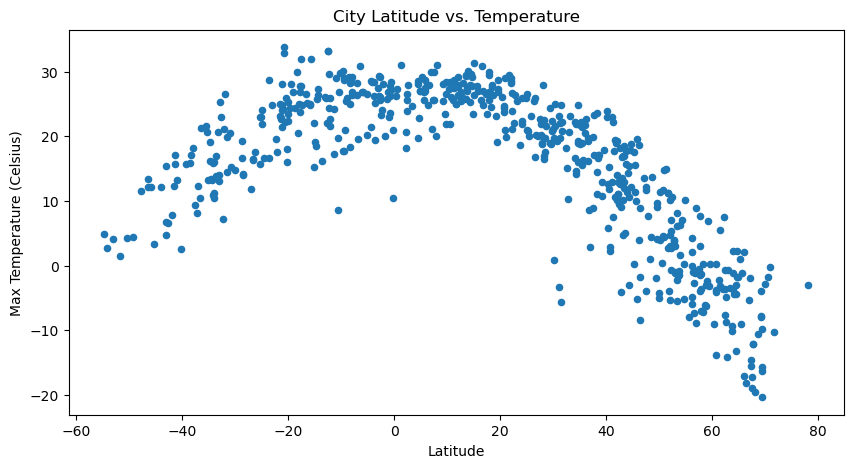

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Max Temp', figsize = (10,5), title = "City Latitude vs. Temperature", xlabel = "Latitude", ylabel = "Max Temperature (Celsius)")
#Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

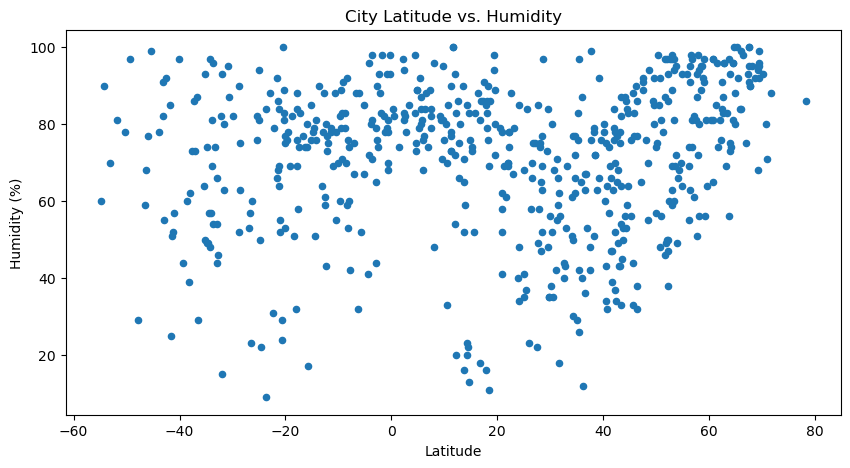

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Humidity', figsize = (10,5), title = "City Latitude vs. Humidity", xlabel = "Latitude", ylabel = "Humidity (%)")
#Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

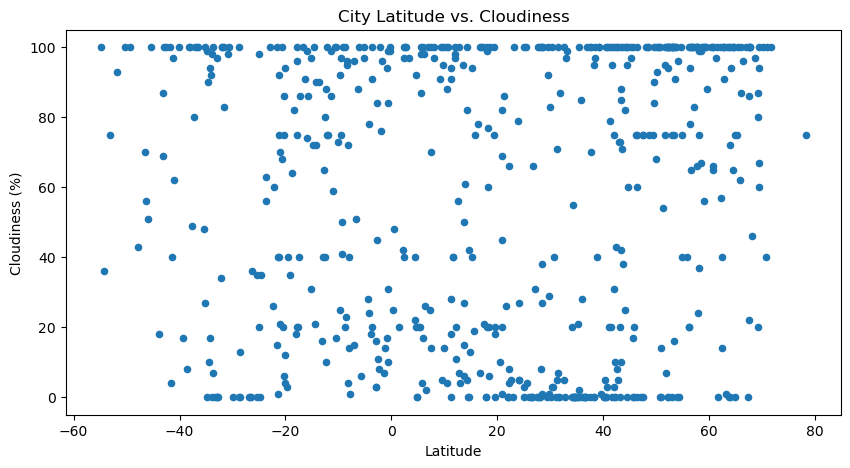

<Figure size 640x480 with 0 Axes>

In [34]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Cloudiness', figsize = (10,5), title = "City Latitude vs. Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness (%)")
#Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

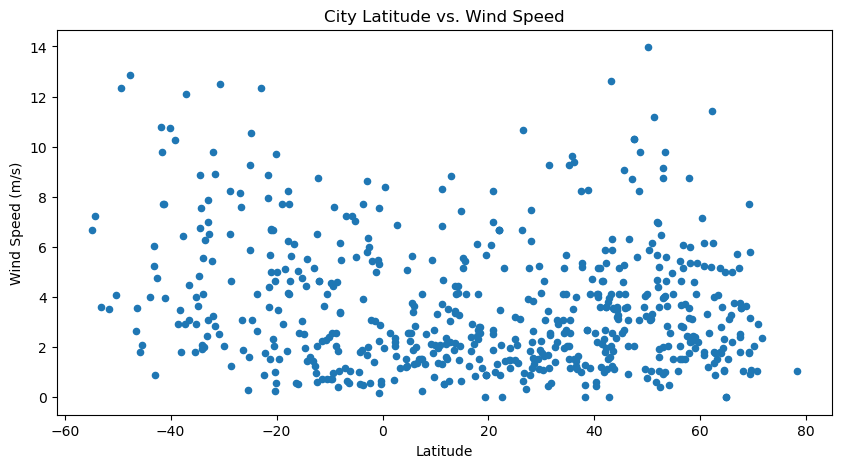

<Figure size 640x480 with 0 Axes>

In [37]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Wind Speed', figsize = (10,5), title = "City Latitude vs. Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)")
#Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,12.42,66,100,3.80,US,1698542896
4,onega,63.9061,38.1404,-3.67,93,100,1.78,RU,1698543334
6,iqaluit,63.7506,-68.5145,-15.15,77,0,5.14,CA,1698542922
8,badger,64.8000,-147.5333,-5.36,88,0,0.00,US,1698543335
10,nova sintra,14.8667,-24.7167,23.44,76,13,7.42,CV,1698542923


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,1.40,81,93,3.53,CL,1698542829
2,port-aux-francais,-49.3500,70.2167,4.44,97,100,12.36,TF,1698542921
3,kone,-21.0595,164.8658,24.21,55,70,4.99,NC,1698542921
5,grytviken,-54.2811,-36.5092,2.74,90,36,7.25,GS,1698542922
7,chui,-33.6971,-53.4616,16.98,96,7,2.01,UY,1698542922


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7948297491536193


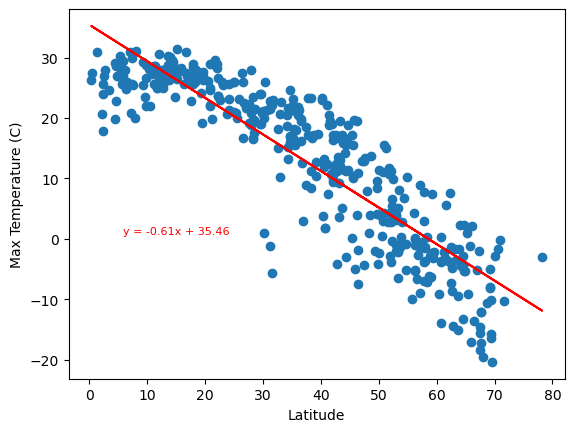

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5401304886482161


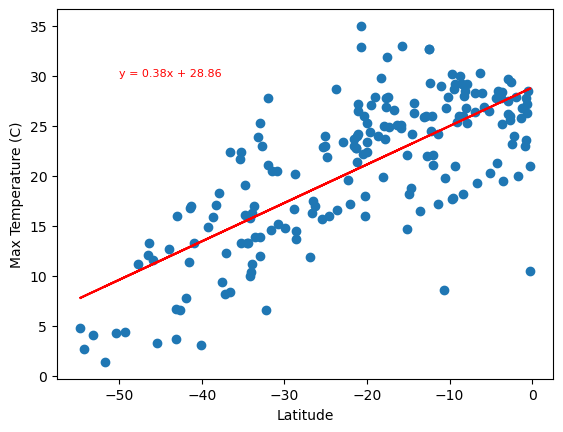

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and max temperature in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and temperature are strongly correlated, with a Pearson's correlation coefficient of 0.79. In the southern hemisphere, latitude and temperature and moderately correlated, with a Pearson's correlation coefficient of 0.54. This indicates that as one gets closer to the equator (closer to halfway between the north pole and the south pole), the temperature will increase.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.043511671428849145


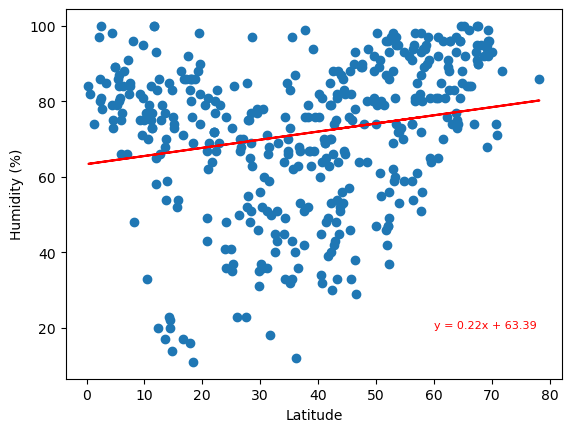

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.024895600485791473


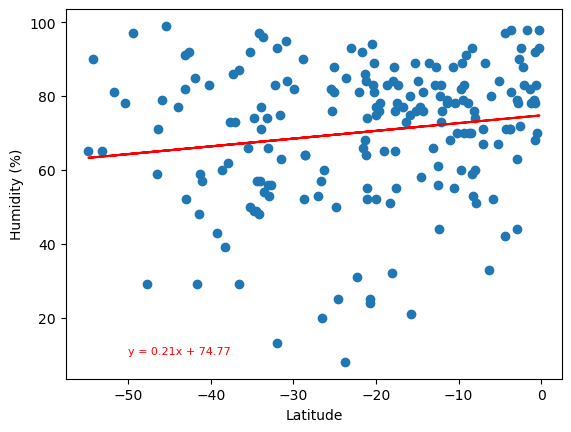

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and % humidity in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and % humidity are not correlated, with a Pearson's correlation coefficient of 0.04. In the southern hemisphere, latitude and % humidity and also not correlated, with a Pearson's correlation coefficient of 0.02. This indicates that there is no strong relationship between humidity and latitude; as one goes closer or further away from the equator, % humidity will not trend in any particular direction. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05905751665981232


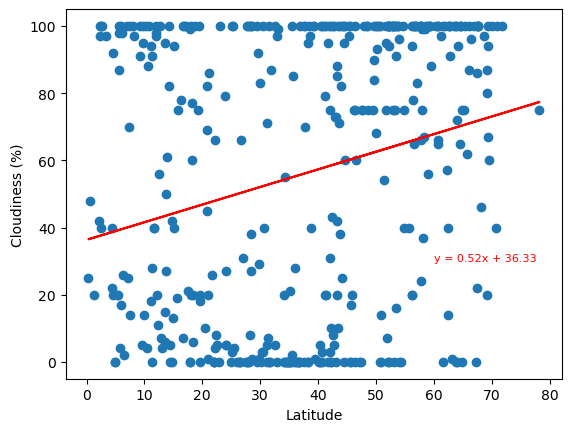

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004593807897912645


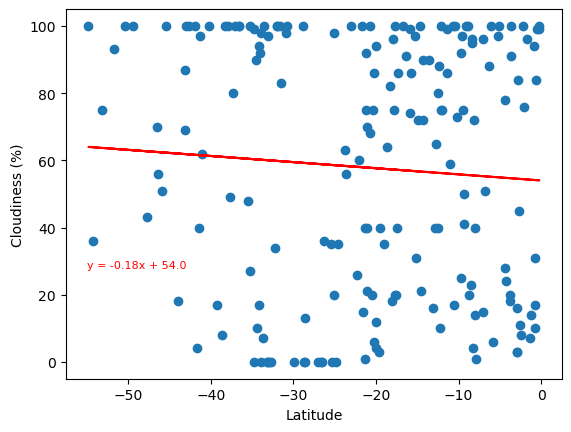

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,28),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and % cloudiness in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and % cloudiness are not correlated, with a Pearson's correlation coefficient of 0.06. In the southern hemisphere, latitude and % cloudiness are also not correlated, with a Pearson's correlation coefficient of 0.004. This indicates that there is no strong relationship between % cloudiness and latitude; as one goes closer or further away from the equator, % cloudiness will not trend in any particular direction. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011797409946777637


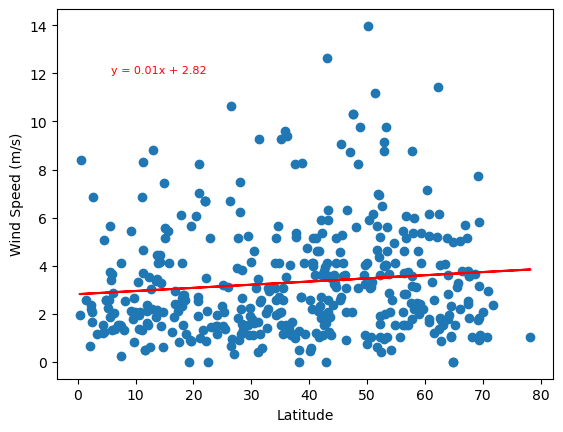

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,12),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09284928960255248


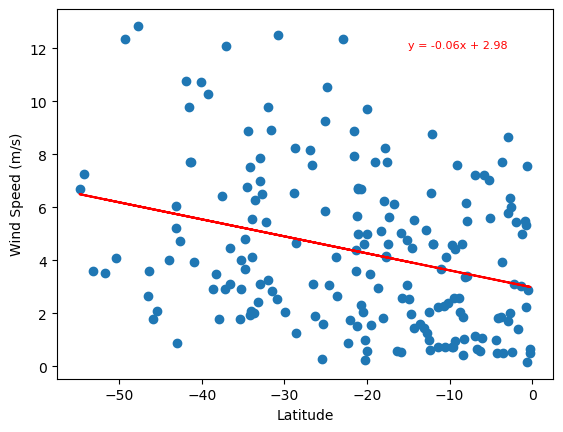

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,12),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and wind speed in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and wind speed are not correlated, with a Pearson's correlation coefficient of 0.01. In the southern hemisphere, latitude and wind speed are also not correlated, with a Pearson's correlation coefficient of 0.09. This indicates that there is no strong relationship between wind speed and latitude; as one goes closer or further away from the equator, wind speed will not trend in any particular direction. 